-----

## Introduction to Unstructured Data

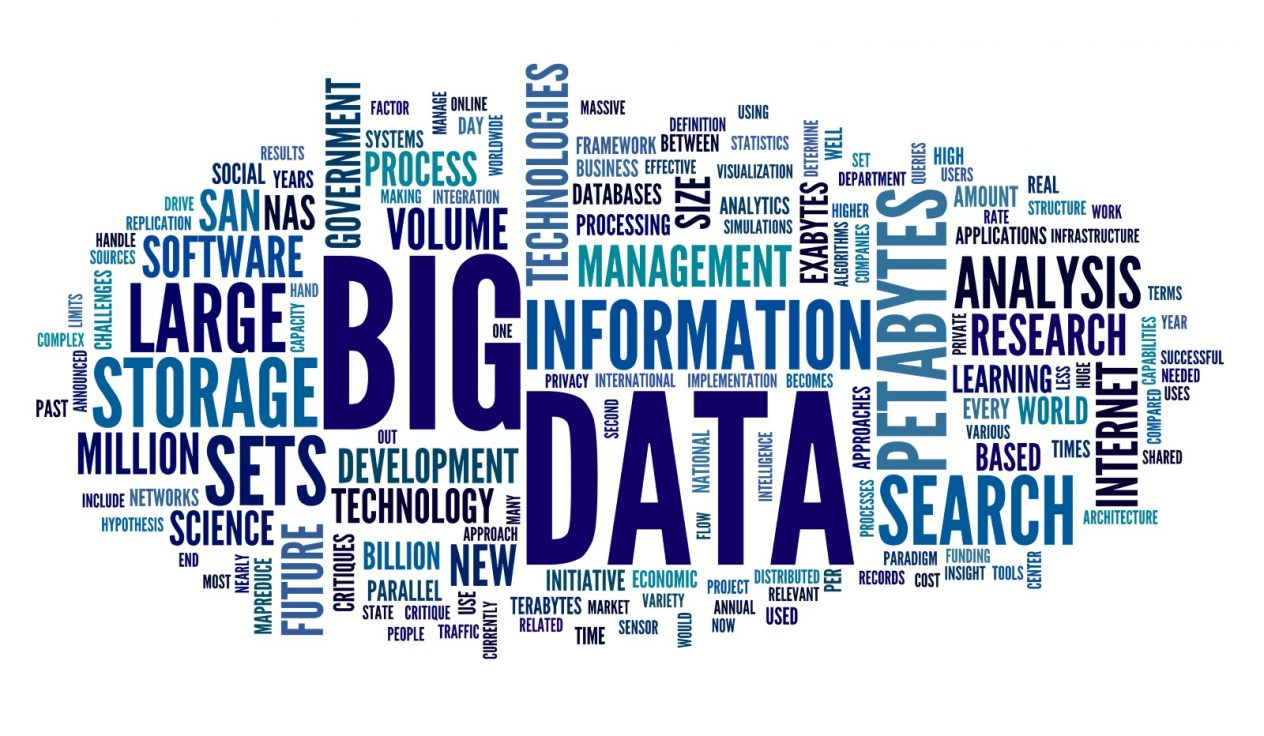

### What is Unstructured Data?
- Information that either does not have a pre-defined data model or is not organized in a pre-defined manner.
- Unstructured information is typically text-heavy, but may contain data such as dates, numbers, and facts as well.
    - This results in irregularities and ambiguities that make it difficult to understand using traditional programs as compared to data stored in fielded form in databases or annotated (semantically tagged) in documents.
    - https://en.wikipedia.org/wiki/Unstructured_data

---

## NLTK
#### Natural Language ToolKit
- http://www.nltk.org
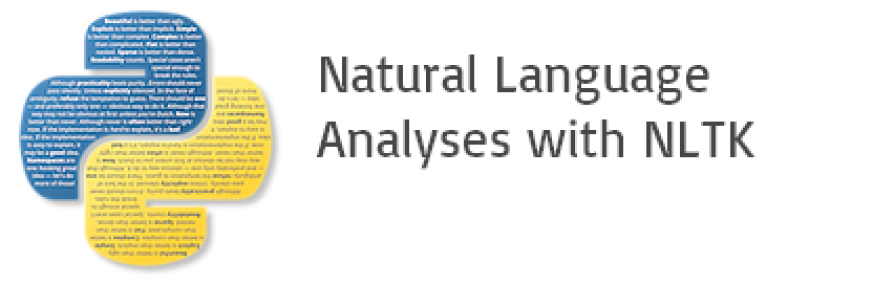

#### Text Tokenization

- There are many examples of data where all or part of the data is text.
- The text is usually formatted as character strings, in some encoding.
    - Later today, we will look at finding patterns in the strings, but in this session, we will look at the text as a sequence of words or tokens.
- Our goal will be to find the words in text so that we can characterize the text by most frequent words, most frequent bigrams (i.e. two-word sequences) or find other significant words in text.
<br><br>
- We are going to work with a text processing package, the Natural Language ToolKit (NLTK).  This package is included in Anaconda so we can just:

In [1]:
import nltk

However, we also need access to packages from the nltk that load separately as nltk_data.  If this part has not been loaded by Anaconda, load it from the python interpreter:

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

- A download window should appear.
    - It’s o.k. to click on “book”, which will take less time to load.
    - If you want “all”, it will get an error, but that will be o.k. because it will have already loaded the parts that we need.

#### The first question is “what is a word?”.
- Suppose that we first try to just separate a text string into words by separating on the spaces.
- Here is some text that is adapted from an excerpt from a random facebook post about <b>Delta Airlines:</b>

In [3]:
text = "I'll never fly Delta again!!  My flight was supposed to leave MCO for ATL at 6:25pm on Saturday, March 26, however, due to severe weather, it was delayed until 8:12pm - no problem. At approx. 8pm we started boarding.  We just sat there at the gate.  No explanation etc. until about 9:30pm when the pilot said we were pushing away from the gate but wouldn't take off. "
text

"I'll never fly Delta again!!  My flight was supposed to leave MCO for ATL at 6:25pm on Saturday, March 26, however, due to severe weather, it was delayed until 8:12pm - no problem. At approx. 8pm we started boarding.  We just sat there at the gate.  No explanation etc. until about 9:30pm when the pilot said we were pushing away from the gate but wouldn't take off. "

In [48]:
words = text.split()
words[:25]

["I'll",
 'never',
 'fly',
 'Delta',
 'again!!',
 'My',
 'flight',
 'was',
 'supposed',
 'to',
 'leave',
 'MCO',
 'for',
 'ATL',
 'at',
 '6:25pm',
 'on',
 'Saturday,',
 'March',
 '26,',
 'however,',
 'due',
 'to',
 'severe',
 'weather,']

We can see that this doesn’t work because words that have punctuation immediately following have not been separated from the punctuation, among other things.

In [5]:
'again!!'

'again!!'

#### Not only does text have words, but punctuation, numbers and other special characters.
- We want to separate include those as well, so we sometimes say the text is a sequence of tokens, which may include words and other special characters.
- There are some issues with splitting words into text, such as whether to separate words with apostrophe, like “don’t” and “I’ve”, or words with hyphens, such as “east-west”.
- The nltk has a function for tokenization that does this work for us.
    - <b>This tokenizer is supposed to be a standard English tokenizer and was trained on tokenized newswire text.</b>

In [49]:
tokens = nltk.word_tokenize(text)
tokens[:25]

['I',
 "'ll",
 'never',
 'fly',
 'Delta',
 'again',
 '!',
 '!',
 'My',
 'flight',
 'was',
 'supposed',
 'to',
 'leave',
 'MCO',
 'for',
 'ATL',
 'at',
 '6:25pm',
 'on',
 'Saturday',
 ',',
 'March',
 '26',
 ',']

- Particularly note the treatment of  ```I’ll``` and ```wouldn’t```
- So let’s get a lot more text and look at collecting the frequencies of tokens.
    - Make sure that your Mongo server is running.
    - Let's fetch some tweets and throw them into mongo for analysis.

---

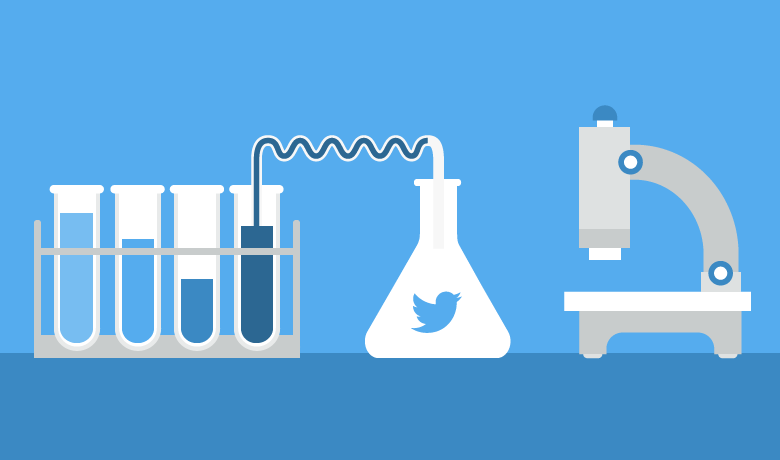

In [11]:
import tweepy
import json

#### YAML - Semi-Structured Data Format
- Primarily used for configuration files 

In [64]:
import yaml

In [65]:
with open('twitter_configs.yaml') as f:
    config = yaml.safe_load(f)

In [66]:
config

{'CONSUMER_KEY': 'EFoNIPpaC8GeL3qBWGxtkmTxJ',
 'CONSUMER_SECRET': 'O3xwQBGcP03afTJ4dKJkKmDhylJIMqXGsRQ2Y6fSQskqp3OmyB',
 'OAUTH_SECRET': 'XTrufn3hzMduJAmO5Z4rbXTOC8azY7T9OPluFrOjJNo5h',
 'OAUTH_TOKEN': '1112509961865699329-ByU2qCjiC85vHPOhwrrlfCXN5zTTGq'}

In [67]:
auth = tweepy.OAuthHandler(config['CONSUMER_KEY'],config['CONSUMER_SECRET'])
auth.set_access_token(config['OAUTH_TOKEN'],config['OAUTH_SECRET'])
api = tweepy.API(auth)

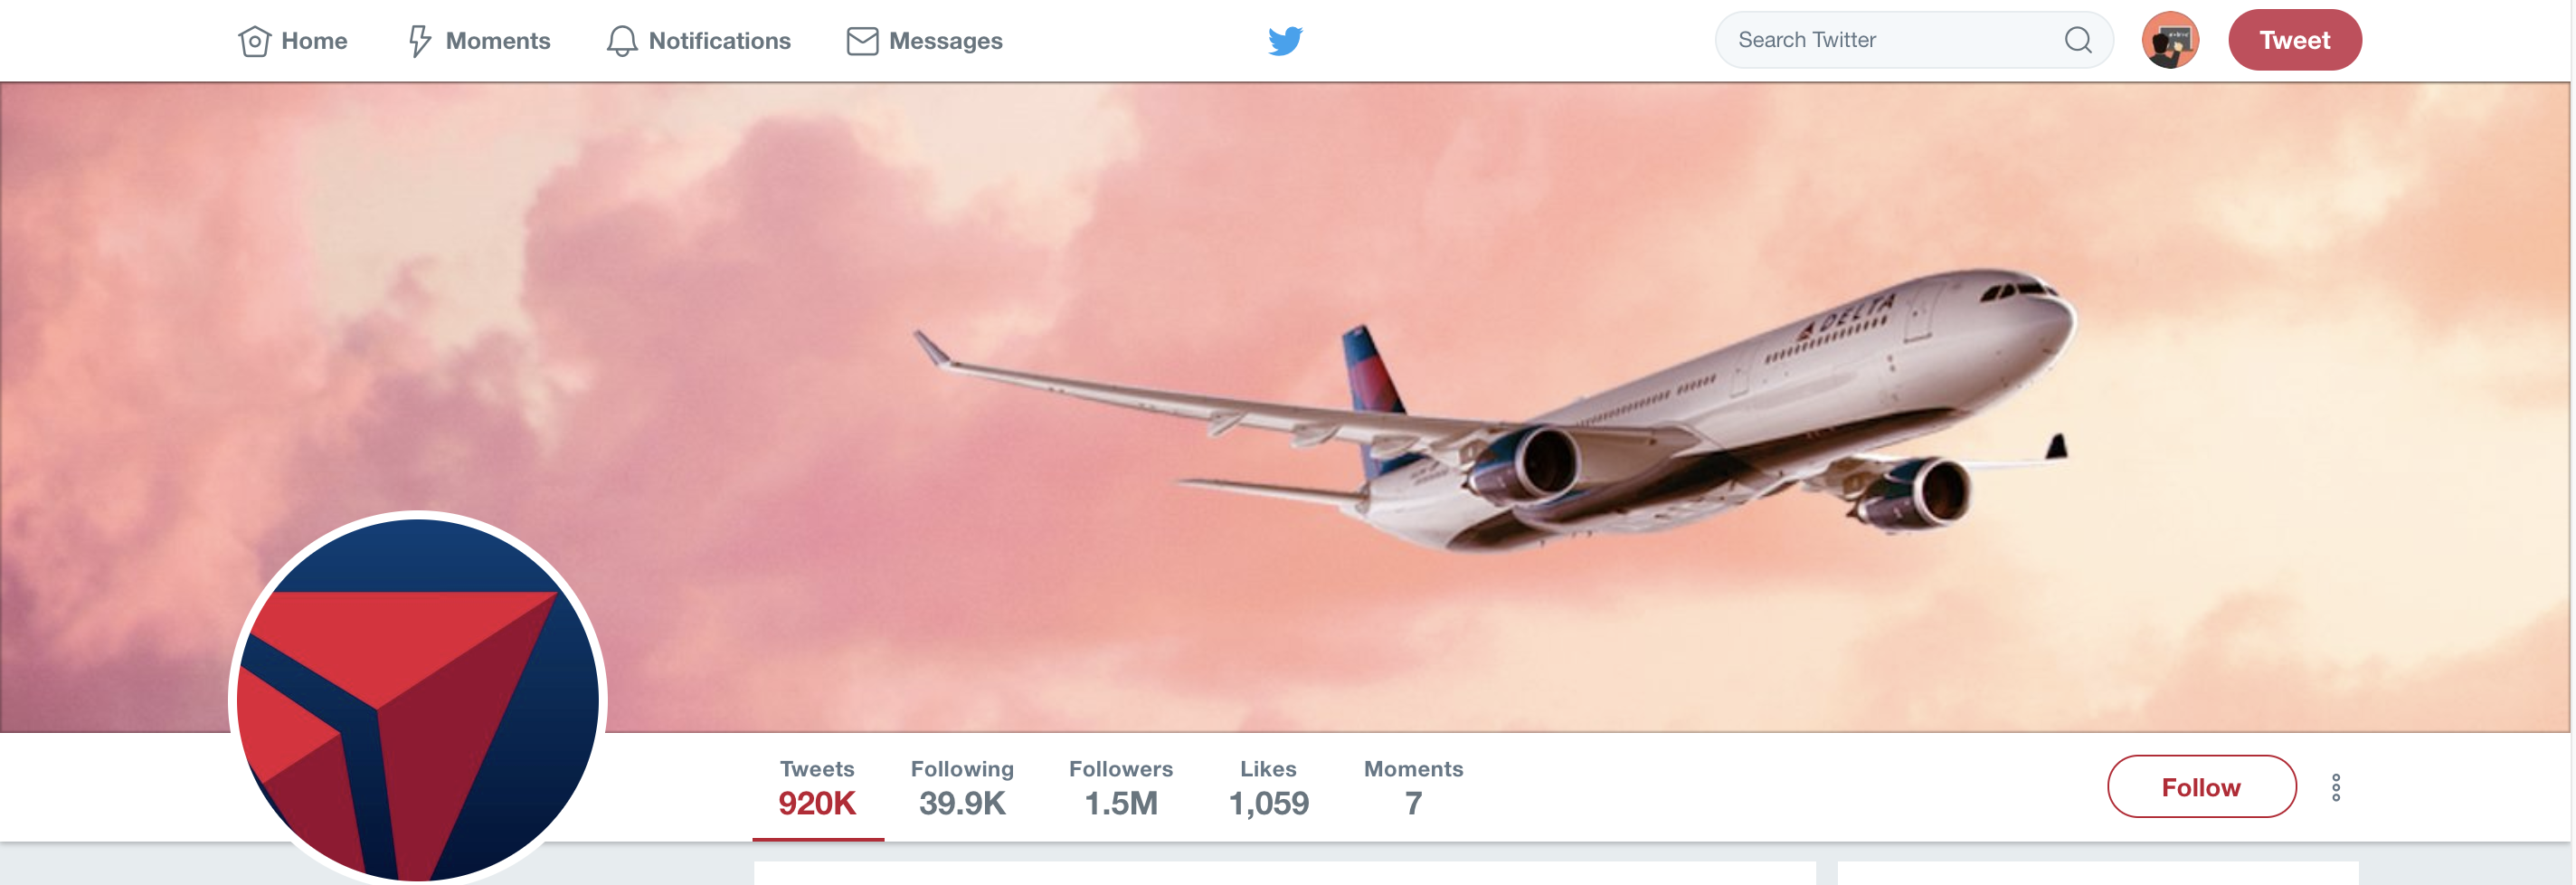

In [68]:
timeline = api.user_timeline('Delta', count=150)
type(timeline)

tweepy.models.ResultSet

In [69]:
tweet_list = list(timeline)

In [24]:
len(tweet_list)

150

In [41]:
tweet_json = [tweet._json for tweet in tweet_list]
tweet_json[:2]

[{'contributors': None,
  'coordinates': None,
  'created_at': 'Mon Apr 08 01:53:21 +0000 2019',
  'entities': {'hashtags': [],
   'symbols': [],
   'urls': [],
   'user_mentions': [{'id': 523368655,
     'id_str': '523368655',
     'indices': [0, 7],
     'name': 'Chris Robinson',
     'screen_name': 'cmrlax'}]},
  'favorite_count': 0,
  'favorited': False,
  'geo': None,
  'id': 1115070090934804480,
  'id_str': '1115070090934804480',
  'in_reply_to_screen_name': 'cmrlax',
  'in_reply_to_status_id': 1115068795117240320,
  'in_reply_to_status_id_str': '1115068795117240320',
  'in_reply_to_user_id': 523368655,
  'in_reply_to_user_id_str': '523368655',
  'is_quote_status': False,
  'lang': 'en',
  'place': None,
  'retweet_count': 0,
  'retweeted': False,
  'source': '<a href="https://www.lithium.com" rel="nofollow">Lithium Tech.</a>',
  'text': '@cmrlax Please provide me with your confirmation code in a dM for further assistance. HAC',
  'truncated': False,
  'user': {'contributors_enab

In [29]:
import pymongo
client = pymongo.MongoClient()
client.database_names()

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: database_names is deprecated. Use list_database_names instead.
  This is separate from the ipykernel package so we can avoid doing imports until


['admin', 'config', 'local', 'names_db', 'peopledb', 'usgs']

In [30]:
db = client.tweets

In [31]:
delta_timeline = db.deltatweets

In [ ]:
delta_timeline.insert_many(tweet_json)

In [79]:
docs = delta_timeline.find()

#### Now the text of a tweet is under the ```text``` key

In [75]:
docs[0]['text']

'@cmrlax Please provide me with your confirmation code in a dM for further assistance. HAC'

In [80]:
tweetlist = [doc['text'] for doc in docs if 'text' in doc.keys()]
len(tweetlist)

150

#### Now to look at the most frequent words in the messages overall
- We first call the <b><i>word_tokenize</i></b> function on each message and then unroll them into one long word/token list.

In [81]:
all_tokens = [tok for tweet in tweetlist for tok in nltk.word_tokenize(tweet)]
len(all_tokens)

3584

In [82]:
all_tokens[:50]

['@',
 'cmrlax',
 'Please',
 'provide',
 'me',
 'with',
 'your',
 'confirmation',
 'code',
 'in',
 'a',
 'dM',
 'for',
 'further',
 'assistance',
 '.',
 'HAC',
 '@',
 'boxerbonbon',
 'Oh',
 ',',
 'wow',
 '!',
 'My',
 'apologies',
 'for',
 'your',
 'difficulties',
 '!',
 'Could',
 'you',
 'DM',
 'your',
 'bag',
 'tag',
 ',',
 'confirmation',
 'or',
 'ticket',
 'number',
 '?',
 '…',
 'https',
 ':',
 '//t.co/DtnvNIOvBx',
 '@',
 'Spin_theGlobe',
 'Hi',
 'there',
 ',']

- We can make a word frequency dictionary ourselves and sort it into reverse frequency order, as we did in the twitter hashtags program.
    - But NLTK has a FreqDist module that does it for us.
- We first construct a word frequency distribution by calling the FreqDist function with a list of all the words.
- Then the most_common function returns a list in order of the most frequent tokens and their frequencies.

In [83]:
msgFD = nltk.FreqDist(all_tokens)
msgFD.most_common(30)

[('.', 184),
 ('@', 159),
 (',', 113),
 (':', 97),
 ('https', 96),
 ('to', 91),
 ('for', 86),
 ('you', 82),
 ('the', 80),
 ('your', 77),
 ('I', 58),
 ('!', 46),
 ('We', 42),
 ('Hi', 41),
 ('and', 33),
 ('be', 31),
 ('our', 30),
 ('Please', 29),
 ('this', 29),
 ('Hello', 27),
 ('is', 27),
 ('a', 26),
 ('us', 25),
 ('with', 24),
 ('are', 24),
 ('of', 23),
 ('we', 22),
 ('Thank', 22),
 ('apologize', 21),
 ('that', 21)]

- Unfortunately, the most frequent tokens are full of punctuation and so-called function words such as ```to```, ```the``` and ```and```.
- Another potential issue is that we may have words capitalized at the beginning of a sentence and not in other parts of sentences and we would like those words to all be counted as one.

- We start by making another all_tokens list by lowercasing the tokens.

In [84]:
# lowercase words as they are tokenized
all_tokens = [tok.lower() for tweet in tweetlist for tok in nltk.word_tokenize(tweet)]
all_tokens[:30]

['@',
 'cmrlax',
 'please',
 'provide',
 'me',
 'with',
 'your',
 'confirmation',
 'code',
 'in',
 'a',
 'dm',
 'for',
 'further',
 'assistance',
 '.',
 'hac',
 '@',
 'boxerbonbon',
 'oh',
 ',',
 'wow',
 '!',
 'my',
 'apologies',
 'for',
 'your',
 'difficulties',
 '!',
 'could']

This <u>all_tokens</u> list is a list of the tokens lower-cased of all the text from the messages in order, and we will keep this list to get the top words by frequency and later to get the top bigrams by frequency.

Next we will remove the function words by using what is called a stopword list.
- There is a stopwords list in NLTK for English (and many other languages), but it has problems.

In [91]:
nltk_stopwords = nltk.corpus.stopwords.words('english')
len(nltk_stopwords)

179

In [92]:
nltk_stopwords[:25]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers']

- Note that this list is meant to be applied to lowercase words.
- But also note that this list doesn’t match with some of the tokenization that we have observed from word_tokenize() in recent versions of the NLTK!
    - So intead, I have made a stopword list that matches the tokenization from word_tokenize() for standard English.
    - To use this list, we read in the text as one giant string and split the words by the “whitespace” that occurs at the end of each line.

In [93]:
all_stopped_tokens = [tok for tok in all_tokens if not tok in nltk_stopwords]
all_stopped_tokens[:50]

['@',
 'cmrlax',
 'please',
 'provide',
 'confirmation',
 'code',
 'dm',
 'assistance',
 '.',
 'hac',
 '@',
 'boxerbonbon',
 'oh',
 ',',
 'wow',
 '!',
 'apologies',
 'difficulties',
 '!',
 'could',
 'dm',
 'bag',
 'tag',
 ',',
 'confirmation',
 'ticket',
 'number',
 '?',
 '…',
 'https',
 ':',
 '//t.co/dtnvniovbx',
 '@',
 'spin_theglobe',
 'hi',
 ',',
 'sincerely',
 'apologize',
 'delayed',
 'retrieval',
 'wheelchair',
 '.',
 'thank',
 'pa…',
 'https',
 ':',
 '//t.co/m4saowgoin',
 '@',
 'jennpereznyc',
 'hi']

#### But we also want to remove punctuation.
- One way would be to add punctuation to the stopwords.
- Another would be  to just remove all the tokens of length 1.
    - But instead we use an alpha_filter function that will let us remove all the tokens that consist entirely of punctuation.
    - This will allow us to remove tokens like “…” and “!!”.

- We’ll create a filter function called <b>alpha_filter</b> which filters out words with all non-alphabetic characters.
- We’ll use a <u>regular expression</u> that matches any token that contains all non-alphabetical character.
    - We’ll be covering regular expressions <b><i>(regex)</i></b> in class later today, but for now, we can just use this one.

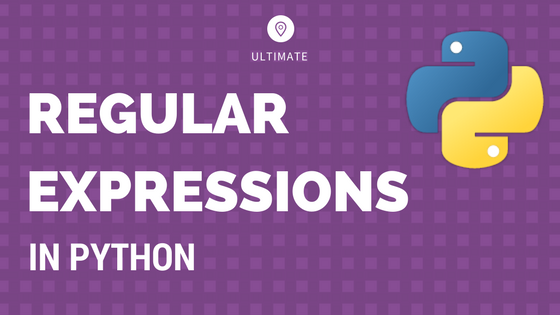
- https://regexr.com/

In [94]:
import re

In [95]:
# function that takes a word and returns true if it consists only
#   of non-alphabetic characters
def alpha_filter(w):
    # pattern to match a word of non-alphabetical characters
    pattern = re.compile('^[^a-z]+$')
    if (pattern.match(w)):
        return True
    else:
        return False

In [97]:
# remove words with all non-alphabetic characters
token_list = [tok for tok in all_stopped_tokens if not alpha_filter(tok)]
token_list[:30]

['cmrlax',
 'please',
 'provide',
 'confirmation',
 'code',
 'dm',
 'assistance',
 'hac',
 'boxerbonbon',
 'oh',
 'wow',
 'apologies',
 'difficulties',
 'could',
 'dm',
 'bag',
 'tag',
 'confirmation',
 'ticket',
 'number',
 'https',
 '//t.co/dtnvniovbx',
 'spin_theglobe',
 'hi',
 'sincerely',
 'apologize',
 'delayed',
 'retrieval',
 'wheelchair',
 'thank']

Now we have a list with mostly content-bearing words, and we can use that list to find topics that are most discussed, such as:
- service
- delayed
- promotion
- appology

In [98]:
msgFD = nltk.FreqDist(token_list)
top_words = msgFD.most_common(30)
for word, freq in top_words:
    print(word, freq)

https 96
please 42
hi 41
hello 27
us 25
thank 24
apologize 21
sorry 20
dm 19
hear 19
happy 18
number 17
confirmation 15
flight 14
provide 12
'm 12
thanks 12
appreciate 11
delay 11
assistance 10
afc 10
delta 10
apologies 9
truly 9
inconvenience 9
bag 8
need 8
check 8
//t.co/6idgbjrmtu 8
sincerely 7


### Note about Twitter tokenization

- The standard NLTK tokenizer separates hashtags, @mentions, URLs and hand-written emoticons.
- There is another tokenizer that has been specialized for Twitter and may also be used for other casual text.
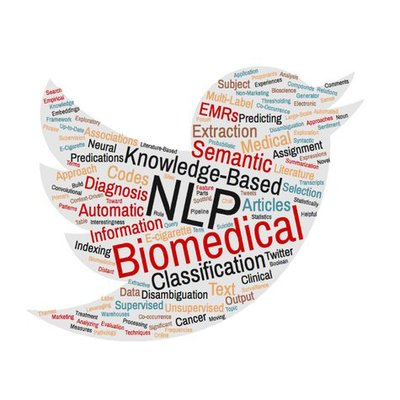

- Here is an example tweet with a standard text tokenizer:

In [99]:
tweet = "RT @OccupySandy: Good Morning NYC. http://t.co/yRLgrB53 #NotAnotherKatrina #sandy"
tokens = nltk.word_tokenize(tweet)

In [100]:
tokens = nltk.word_tokenize(tweet)
tokens

['RT',
 '@',
 'OccupySandy',
 ':',
 'Good',
 'Morning',
 'NYC',
 '.',
 'http',
 ':',
 '//t.co/yRLgrB53',
 '#',
 'NotAnotherKatrina',
 '#',
 'sandy']

##### Instead, we can initialize a TweetTokenizer and run it on the example tweet.

In [101]:
ttokenizer = nltk.tokenize.TweetTokenizer()
tokens = ttokenizer.tokenize(tweet)
tokens

['RT',
 '@OccupySandy',
 ':',
 'Good',
 'Morning',
 'NYC',
 '.',
 'http://t.co/yRLgrB53',
 '#NotAnotherKatrina',
 '#sandy']

If you process a collection of tweets, you should <b><u>start with this tokenizer</u></b> and continue on through the steps with lowercase, word twitter stopwords and eliminating words with the alpha_filter function.

##### Tokenize Tweets Again using Twitter Tokenizer

In [112]:
# lowercase words as they are tokenized using the twitter tokenizer
all_tweet_tokens = [tok.lower() for tweet in tweetlist for tok in ttokenizer.tokenize(tweet)]
all_tweet_tokens[:30]

['@cmrlax',
 'please',
 'provide',
 'me',
 'with',
 'your',
 'confirmation',
 'code',
 'in',
 'a',
 'dm',
 'for',
 'further',
 'assistance',
 '.',
 'hac',
 '@boxerbonbon',
 'oh',
 ',',
 'wow',
 '!',
 'my',
 'apologies',
 'for',
 'your',
 'difficulties',
 '!',
 'could',
 'you',
 'dm']

In [111]:
# remove words with all non-alphabetic characters
tweet_token_list = [tok for tok in all_tweet_tokens if not alpha_filter(tok)]
tweet_token_list[:30]

['@cmrlax',
 'please',
 'provide',
 'me',
 'with',
 'your',
 'confirmation',
 'code',
 'in',
 'a',
 'dm',
 'for',
 'further',
 'assistance',
 'hac',
 '@boxerbonbon',
 'oh',
 'wow',
 'my',
 'apologies',
 'for',
 'your',
 'difficulties',
 'could',
 'you',
 'dm',
 'your',
 'bag',
 'tag',
 'confirmation']

### Bigram Frequency Distributions

Another way to look for interesting characterizations of a corpus is to look at <b>pairs of words</b> that are frequently collocated, that is, they occur in a sequence called a bigram.

- First, we just simply look at the bigrams that can be defined.
    - It is important to define this list with all the tokens before filtering so that the order of 2 word sequences in preserved.

In [129]:
# use all_tweet_tokens before alpha filter

textbigrams = list(nltk.bigrams(all_tweet_tokens))
textbigrams[:20]

[('@cmrlax', 'please'),
 ('please', 'provide'),
 ('provide', 'me'),
 ('me', 'with'),
 ('with', 'your'),
 ('your', 'confirmation'),
 ('confirmation', 'code'),
 ('code', 'in'),
 ('in', 'a'),
 ('a', 'dm'),
 ('dm', 'for'),
 ('for', 'further'),
 ('further', 'assistance'),
 ('assistance', '.'),
 ('.', 'hac'),
 ('hac', '@boxerbonbon'),
 ('@boxerbonbon', 'oh'),
 ('oh', ','),
 (',', 'wow'),
 ('wow', '!')]

- The nltk.bigrams() function returns a <i>generator</i>, but we can turn it into a list by applying the type ‘list’ to it as a function.

- We will obtain a lot more functionality by using the functions from the nltk.collocations package.
- One of the places to obtain information about this package is in this section of the NLTK documentation called the <b>HOWTOS</b>.
- We note that there are also Trigram functions in addition to the Bigram functions shown here.
<br><br>
- http://www.nltk.org/howto/collocations.html

#### To start using bigrams, we import the collocation finder module

In [130]:
from nltk.collocations import *

#### Next, for convenience, we define a variable for the bigram measures.

In [131]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
type(bigram_measures)

nltk.metrics.association.BigramAssocMeasures

- We start by making an object called a <b>BigramCollocationFinder</b>.
- The finder then allows us to call other functions to filter the bigrams that it collected and to give scores to the bigrams.
- We start by scoring the bigrams by frequency.
    - This finds the most frequently occurring bigrams.

In [132]:
finder = BigramCollocationFinder.from_words(tweet_token_list)
scored = finder.score_ngrams(bigram_measures.raw_freq)
scored[:10]

[(('for', 'the'), 0.011391954432182272),
 (('thank', 'you'), 0.008187967248131008),
 (('you', 'for'), 0.007475970096119616),
 (('to', 'hear'), 0.006763972944108224),
 (('apologize', 'for'), 0.006407974368102528),
 (('happy', 'to'), 0.006407974368102528),
 (('please', 'dm'), 0.00533997864008544),
 (('be', 'happy'), 0.004983980064079744),
 (('for', 'your'), 0.004271982912068352),
 (('confirmation', 'number'), 0.003915984336062656)]

- The result from the score_ngrams function is a list consisting of pairs, where each pair is a bigram and its score.
- The <b>raw_freq</b> measure returns frequency as the ratio of the count of the bigram over the count of the total bigrams.

In [133]:
type(scored)

list

In [134]:
first = scored[0]
type(first)

tuple

##### We can see that these scores are sorted into order by decreasing frequency.

In [135]:
for bscore in scored[:30]:
    print (bscore)

(('for', 'the'), 0.011391954432182272)
(('thank', 'you'), 0.008187967248131008)
(('you', 'for'), 0.007475970096119616)
(('to', 'hear'), 0.006763972944108224)
(('apologize', 'for'), 0.006407974368102528)
(('happy', 'to'), 0.006407974368102528)
(('please', 'dm'), 0.00533997864008544)
(('be', 'happy'), 0.004983980064079744)
(('for', 'your'), 0.004271982912068352)
(('confirmation', 'number'), 0.003915984336062656)
(('dm', 'your'), 0.003915984336062656)
(('your', 'confirmation'), 0.003915984336062656)
(('for', 'you'), 0.00355998576005696)
(('sorry', 'to'), 0.00355998576005696)
(('the', 'delay'), 0.00355998576005696)
(('you', 'please'), 0.00355998576005696)
(('appreciate', 'your'), 0.003203987184051264)
(('hear', 'that'), 0.003203987184051264)
(('i', 'am'), 0.003203987184051264)
(('thanks', 'for'), 0.003203987184051264)
(('have', 'a'), 0.002847988608045568)
(('hi', 'there'), 0.002847988608045568)
(('if', 'you'), 0.002847988608045568)
(('this', 'for'), 0.002847988608045568)
(('we', 'appreciat

- Once we have created a finder with the base bigrams, then we can apply filter functions to filter out unwanted ones.
- The finder uses a filter that is applied to the individual words.
- Note that the function apply_word_filter changes the bigram collocation in the variable <i>finder</i>, and any function which takes a word parameter and returns <b>True</b> or <b>False</b> as a result can be used.

We’ll first filter out the special characters by using the alpha_filter function that we defined already.

In [136]:
finder.apply_word_filter(alpha_filter)
scored = finder.score_ngrams(bigram_measures.raw_freq)
for bscore in scored[:30]:
    print (bscore)

(('for', 'the'), 0.011391954432182272)
(('thank', 'you'), 0.008187967248131008)
(('you', 'for'), 0.007475970096119616)
(('to', 'hear'), 0.006763972944108224)
(('apologize', 'for'), 0.006407974368102528)
(('happy', 'to'), 0.006407974368102528)
(('please', 'dm'), 0.00533997864008544)
(('be', 'happy'), 0.004983980064079744)
(('for', 'your'), 0.004271982912068352)
(('confirmation', 'number'), 0.003915984336062656)
(('dm', 'your'), 0.003915984336062656)
(('your', 'confirmation'), 0.003915984336062656)
(('for', 'you'), 0.00355998576005696)
(('sorry', 'to'), 0.00355998576005696)
(('the', 'delay'), 0.00355998576005696)
(('you', 'please'), 0.00355998576005696)
(('appreciate', 'your'), 0.003203987184051264)
(('hear', 'that'), 0.003203987184051264)
(('i', 'am'), 0.003203987184051264)
(('thanks', 'for'), 0.003203987184051264)
(('have', 'a'), 0.002847988608045568)
(('hi', 'there'), 0.002847988608045568)
(('if', 'you'), 0.002847988608045568)
(('this', 'for'), 0.002847988608045568)
(('we', 'appreciat

- Next we can filter out the stopwords if we wish.
    - Note that the lambda operates like a function definition “on-the-fly” (i.e. without a function name).

In [138]:
finder.apply_word_filter(lambda w: w in nltk_stopwords)
scored = finder.score_ngrams(bigram_measures.raw_freq)
for bscore in scored[:20]:
    print (bscore)

(('please', 'dm'), 0.00533997864008544)
(('confirmation', 'number'), 0.003915984336062656)
(('sincerely', 'apologize'), 0.002491990032039872)
(("i'm", 'sorry'), 0.002135991456034176)
(('please', 'let'), 0.002135991456034176)
(('bag', 'tag'), 0.00177999288002848)
(('feel', 'free'), 0.00177999288002848)
(('let', 'us'), 0.00177999288002848)
(('please', 'provide'), 0.00177999288002848)
(('us', 'know'), 0.00177999288002848)
(('us', 'today'), 0.001423994304022784)
(('aab', 'https://t.co/6idgbjrmtu'), 0.001067995728017088)
(('also', 'provide'), 0.001067995728017088)
(('dm', 'us'), 0.001067995728017088)
(('hi', 'thank'), 0.001067995728017088)
(('need', 'assistance'), 0.001067995728017088)
(('please', 'feel'), 0.001067995728017088)
(('please', 'share'), 0.001067995728017088)
(('pls', 'also'), 0.001067995728017088)
(('tag', 'number'), 0.001067995728017088)


---
### A note on additional ways to filter bigrams:
- Another filter would remove words that only occurred with a frequency over some minimum threshold.
     - But to show its effect, we first start over with a newly defined finder 

In [144]:
finder2 = BigramCollocationFinder.from_words(all_tweet_tokens)
finder2.apply_freq_filter(2)
scored = finder2.score_ngrams(bigram_measures.raw_freq)
for bscore in scored[:20]:
    print (bscore)

(('for', 'the'), 0.009711684370257967)
(('.', 'we'), 0.006980273141122913)
(('thank', 'you'), 0.006980273141122913)
(('.', 'please'), 0.006676783004552352)
(('you', 'for'), 0.006069802731411229)
(('to', 'hear'), 0.005766312594840668)
(('apologize', 'for'), 0.005462822458270106)
(('happy', 'to'), 0.005462822458270106)
(('please', 'dm'), 0.004552352048558422)
(('be', 'happy'), 0.004248861911987861)
(('.', 'thank'), 0.0036418816388467377)
(('for', 'your'), 0.0036418816388467377)
(('you', '.'), 0.0036418816388467377)
((',', 'we'), 0.003338391502276176)
(('.', 'i'), 0.003338391502276176)
(('confirmation', 'number'), 0.003338391502276176)
(('dm', 'your'), 0.003338391502276176)
(('your', 'confirmation'), 0.003338391502276176)
(('.', 'afc'), 0.0030349013657056147)
(('for', 'you'), 0.0030349013657056147)


- Another word level filter would be to remove words whose length is small.
- Or we can apply filters that work on both words of the bigram.
<br><br>
- Suppose that we want to filter out bigrams in which the first word’s length is less than 2.
    - Then we could use an ngram filter that is applied to both words of the bigram.


In [145]:
finder2.apply_ngram_filter(lambda w1, w2: len(w1) < 2)
scored = finder2.score_ngrams(bigram_measures.raw_freq)
for bscore in scored[:20]:
    print (bscore)

(('for', 'the'), 0.009711684370257967)
(('thank', 'you'), 0.006980273141122913)
(('you', 'for'), 0.006069802731411229)
(('to', 'hear'), 0.005766312594840668)
(('apologize', 'for'), 0.005462822458270106)
(('happy', 'to'), 0.005462822458270106)
(('please', 'dm'), 0.004552352048558422)
(('be', 'happy'), 0.004248861911987861)
(('for', 'your'), 0.0036418816388467377)
(('you', '.'), 0.0036418816388467377)
(('confirmation', 'number'), 0.003338391502276176)
(('dm', 'your'), 0.003338391502276176)
(('your', 'confirmation'), 0.003338391502276176)
(('for', 'you'), 0.0030349013657056147)
(('sorry', 'to'), 0.0030349013657056147)
(('the', 'delay'), 0.0030349013657056147)
(('appreciate', 'your'), 0.002731411229135053)
(('hear', 'that'), 0.002731411229135053)
(('thanks', 'for'), 0.002731411229135053)
(('have', 'a'), 0.0024279210925644916)


### Review:
- Fetching Tweets
- Tokenization
- Token Filtering
- Bigram Analysis

---

## Extra Mention

### Word Cloud

In [160]:
%matplotlib inline

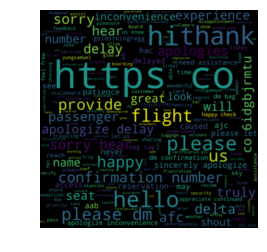

In [162]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
# Create a list of word
tweet_token_str = ' '.join(tweet_token_list)
 
# Create the wordcloud object
wordcloud = WordCloud(background_color='black',width=1600, height=1600, margin=0).generate(tweet_token_str)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='gaussian')
plt.axis("off")
plt.margins(x=1, y=1)
plt.show()

----